In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
os.chdir("../../005_src")

from config import *
print (os.getenv('CONDA_PREFIX'))

----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Plotting import successful
Functions Data Adjustments import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

/usr/prakt/s0014/anaconda3/en

In [2]:
device = cudaOverview()

CUDA available
Number of Devices: 1
ID current Device NVIDIA GeForce GTX 1050 Ti: 0
	current GPU memory usage by tensors in bytes:0
	current GPU memory managed by caching allocator in bytes:0


In [3]:
filenames = sorted(glob.glob(f"{OUTPUT_DIR}"+"/**/*"+f"*training_parameters.pkl", recursive=True))
all_dict = [pkl.load(open(this_file,"rb"))for this_file in filenames]
#all_dict = [pkl.loads(memoryview(open(this_file,"rb"))) for this_file in filenames]

df = pd.DataFrame(all_dict)

at 10h57m49s imported models:
['GCN_HL01', 'GCN_HL02', 'GCN_HL03']
edges_attr=True
at 10h57m49s imported models:
['GCN_HL01_relu', 'GCN_HL01_tanh', 'GCN_HL02_relu', 'GCN_HL02_tanh', 'GCN_HL03_relu', 'GCN_HL03_tanh']
edges_attr=True
at 10h57m49s imported models:
['GCN_HL01_leaky_relu', 'GCN_HL01_relu', 'GCN_HL01_tanh', 'GCN_HL02_leaky_relu', 'GCN_HL02_relu', 'GCN_HL02_tanh', 'GCN_HL03_leaky_relu', 'GCN_HL03_relu', 'GCN_HL03_tanh']


In [4]:
df.columns

Index(['run_time', 'model', 'random_seed', 'train_size', 'batch_size',
       'Nepochs', 'save_every', 'transformstat', 'plotstat', 'printstat',
       'input_file_name', 'num_rows_training', 'num_rows_validation',
       'num_rows_test', 'exclude_yaw', 'concatenatestat', 'paddingstat',
       'size_input', 'size_output', 'model_architecture', 'tloss_path',
       'criterion', 'optimizer', 'final_loss', 'train', 'val', 'lr',
       'final_train_loss', 'final_val_loss', 'intentionstat', 'model_path',
       'train_losses_path', 'val_losses_path', 'lr_path', 'max_num_veh',
       'sim_duration_timesteps', 'figure_paths', 'shuttle_train_frame',
       'shuttle_val_frame', 'hidden_layers_sizes', 'reduction', 'scheduler',
       'run_date', 'combo', 'use_edges_attr', 'activation_function',
       'epoch14000_train_loss', 'epoch14000_final_val_loss',
       'epoch28000_train_loss', 'epoch28000_final_val_loss',
       'epoch2500_train_loss', 'epoch2500_final_val_loss',
       'epoch5000_train

# TABLE TRAININGS OVERVIEW

here all the trainings completed succcessfully with a txt file 

In [5]:
df.scheduler.unique()

array([nan,
       None, 'ReduceLROnPlateau', 'MultiStepLR',
       'CosineAnnealingWarmRestarts', 'NoneType'], dtype=object)

# Comparative overviews

In [6]:
GCN_MODEL = "GCN_013"
MODEL_PATH =os.path.join(OUTPUT_DIR,GCN_MODEL)
MODEL_PATH

'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013'

## Compare GCN_013

In [7]:
mask = (df.model == GCN_MODEL) #and (df.Nepochs == 5000)
df_top = df[mask][[
                'run_date',
                'run_time', 
                'model',
                'Nepochs',
                'batch_size',
                #'input_file_name',
                #'size_input', 
                #'size_output', 
                'model_architecture', 
                'num_rows_training',

                'criterion', 
                'optimizer', 
                #'reduction',
                'scheduler',

                'final_train_loss', 
                'final_val_loss', 
                #'intentionstat', 
                #'model_path',
                'train_losses_path', 
                'val_losses_path',
            
               #'lr',
                'use_edges_attr',
                'activation_function',
                'combo'
                
                   
           ]]
df_top

,run_date,run_time,model,Nepochs,batch_size,model_architecture,num_rows_training,criterion,optimizer,scheduler,final_train_loss,final_val_loss,train_losses_path,val_losses_path,use_edges_attr,activation_function,combo
167,20210721-,00h24m09s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",10588,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,MultiStepLR,7.360706,7.583233,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"(mean, 512, Adam, L1, [128, 256, 64], 0.001, 0..."
168,20210721-,01h22m25s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",10588,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,CosineAnnealingWarmRestarts,8.783377,9.039446,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,True,tanh,"(mean, 512, Adam, L1, [128, 256, 64], 0.01, 0...."
169,20210721-,02h19m13s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",10588,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,CosineAnnealingWarmRestarts,7.537840,7.844699,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"(mean, 512, Adam, L1, [128, 256, 64], 0.01, 0...."
170,20210721-,03h13m54s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",10588,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NoneType,8.806074,9.067188,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,True,tanh,"(mean, 512, Adam, L1, [128, 256, 64], 0.01, 0...."
171,20210721-,04h08m35s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",10588,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NoneType,6.517203,6.971251,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"(mean, 512, Adam, L1, [128, 256, 64], 0.01, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,20210723-,10h25m02s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",127,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NoneType,10.586502,12.224185,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"(mean, 512, Adam, L1, [128, 128, 256], 0.01, 0..."
303,20210723-,10h26m24s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",127,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,MultiStepLR,14.047379,13.775198,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,True,tanh,"(mean, 512, Adam, L1, [128, 128, 256], 0.01, 0..."
304,20210723-,10h27m46s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",127,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,MultiStepLR,13.309790,13.755981,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"(mean, 512, Adam, L1, [128, 128, 256], 0.01, 0..."
305,20210723-,10h55m35s,GCN_013,5000,128,"GCN_HL03_relu(\n (conv1): GCNConv(6, 64)\n (...",127,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,CosineAnnealingWarmRestarts,24334.445312,2619.540039,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,True,relu,"(sum, 128, Adam, L1, [64, 128, 256], 0.01, 0.6..."


In [8]:
# correcting rows missing the 
df_top.loc[148:181, 'run_date'] = df_top.loc[182]['run_date']

In [9]:
df_top = df_top.sort_values(by=['final_val_loss'])
df_top#[df_top.batch_size == 1024]

,run_date,run_time,model,Nepochs,batch_size,model_architecture,num_rows_training,criterion,optimizer,scheduler,final_train_loss,final_val_loss,train_losses_path,val_losses_path,use_edges_attr,activation_function,combo
288,20210721-,22h28m11s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",10588,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NoneType,5.892495,6.243418,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"(mean, 512, Adam, L1, [128, 256, 64], 0.001, 0..."
286,20210721-,20h33m28s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",10588,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,CosineAnnealingWarmRestarts,6.185915,6.461990,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"(mean, 512, Adam, L1, [128, 256, 64], 0.001, 0..."
183,20210721-,15h22m13s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",10588,L1Loss(),SGD (\nParameter Group 0\n dampening: 0\n ...,NoneType,6.433732,6.613489,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"(mean, 512, SGD, L1, [128, 256, 64], 0.01, 0.6..."
171,20210721-,04h08m35s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",10588,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NoneType,6.517203,6.971251,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"(mean, 512, Adam, L1, [128, 256, 64], 0.01, 0...."
181,20210721-,13h28m10s,GCN_013,5000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",10588,L1Loss(),SGD (\nParameter Group 0\n dampening: 0\n ...,CosineAnnealingWarmRestarts,6.966848,7.143092,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"(mean, 512, SGD, L1, [128, 256, 64], 0.01, 0.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,20210721-,19h25m56s,GCN_013,5000,1024,"GCN_HL03_relu(\n (conv1): GCNConv(6, 128)\n ...",127,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NoneType,9.076761,144.418365,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,True,relu,"(mean, 1024, Adam, L1, [128, 256, 64], 0.001, ..."
305,20210723-,10h55m35s,GCN_013,5000,128,"GCN_HL03_relu(\n (conv1): GCNConv(6, 64)\n (...",127,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,CosineAnnealingWarmRestarts,24334.445312,2619.540039,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,True,relu,"(sum, 128, Adam, L1, [64, 128, 256], 0.01, 0.6..."
290,20210722-,21h12m45s,GCN_013,70000,512,"GCN_HL03_tanh(\n (conv1): GCNConv(6, 128)\n ...",10588,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,NoneType,NaN,NaN,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"[mean, 512, Adam, L1, [128, 256, 64], 0.001, 0..."
292,20210723-,10h11m43s,GCN_013,5000,512,"GCN_HL02_tanh(\n (conv1): GCNConv(6, 64)\n (...",127,L1Loss(),Adam (\nParameter Group 0\n amsgrad: False\...,CosineAnnealingWarmRestarts,NaN,NaN,/storage/remote/atcremers50/ss21_multiagentcon...,/storage/remote/atcremers50/ss21_multiagentcon...,False,tanh,"(mean, 512, Adam, L1, [64, 128], 0.01, 0.6, 0,..."


In [10]:
best_k = df_top.iloc[0].run_time

Comparing 6 models
possible keys to choose from:
: ['run_date', 'run_time', 'model', 'Nepochs', 'batch_size', 'model_architecture', 'num_rows_training', 'criterion', 'optimizer', 'scheduler', 'final_train_loss', 'final_val_loss', 'train_losses_path', 'val_losses_path', 'use_edges_attr', 'activation_function', 'combo']
min_len=5000
Comparing 6 models
possible keys to choose from:
: ['run_date', 'run_time', 'model', 'Nepochs', 'batch_size', 'model_architecture', 'num_rows_training', 'criterion', 'optimizer', 'scheduler', 'final_train_loss', 'final_val_loss', 'train_losses_path', 'val_losses_path', 'use_edges_attr', 'activation_function', 'combo']
min_len=5000


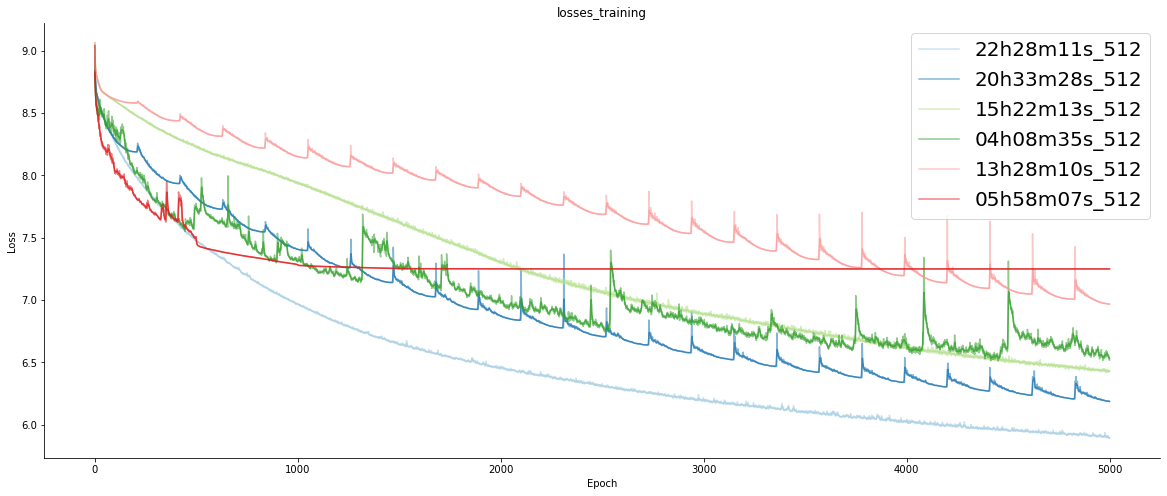

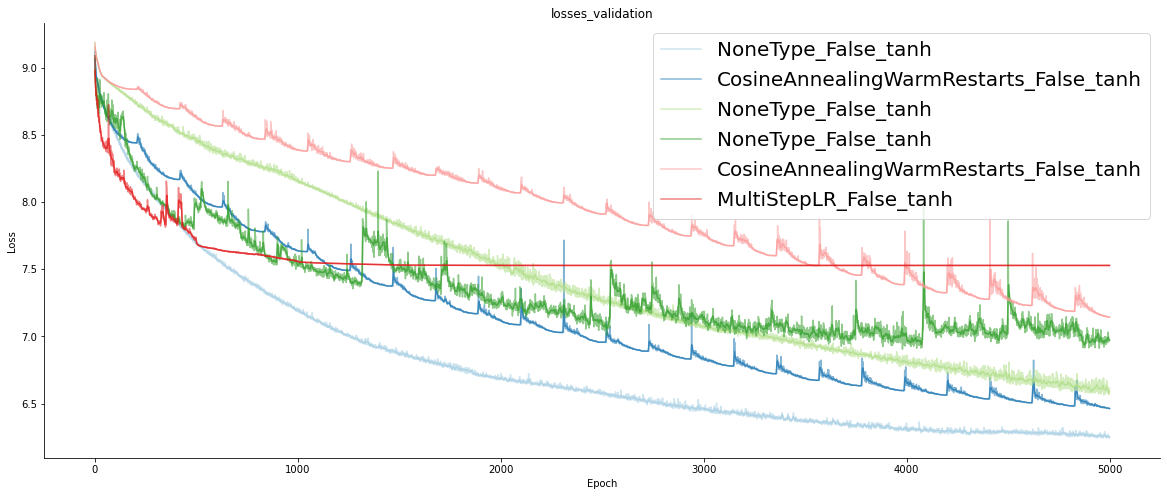

In [11]:
t_losses = {}
TOP = 6
for r in df_top.index[:TOP]:
    t_loss_path = df_top.loc[r]['train_losses_path']
    model_details = df_top.loc[r]
    t_loss_load = pkl.load(open(t_loss_path, 'rb'))
    t_losses[r] = (t_loss_load, model_details.to_dict())
v_losses = {}
for r in df_top.index[:TOP]:
    v_loss_path = df_top.loc[r]['val_losses_path']
    model_details = df_top.loc[r]
    v_loss_load = pkl.load(open(v_loss_path, 'rb'))
    v_losses[r] = (v_loss_load, model_details.to_dict())
fig = compare_losses(
                   t_losses,
                   title_1 = "losses_training",
                   columns = ["run_time","batch_size"],
                     
                   #losses_dict_2 = v_losses,
                   #title_2 = "losses_validation",
                   #columns_2 = ["model","scheduler"],
                   gaussian=True,
                   sigma=2,
                   figsize=(20, 8),
                ) 

fig = compare_losses(
                   v_losses,
                   title_1 = "losses_validation",
                   columns = ["scheduler",'use_edges_attr', "activation_function"],
                     
                   #losses_dict_2 = v_losses,
                   #title_2 = "losses_validation",
                   #columns_2 = ["model","scheduler"],
                   gaussian=True,
                   sigma=2,
                   figsize=(20, 8),
                )  

In [12]:
mask = df.run_time == best_k
print ("-"*80)
print (f"\n {best_k}\n")
print (dict(df[mask]['optimizer']))

architecture = dict(df[mask]['model_architecture'])
print (architecture)
#first_key = list(architecture.keys())[0]
#str(type(architecture[first_key]))[:]
#print (df[mask].T)

--------------------------------------------------------------------------------

 22h28m11s

{288: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)}
{288: GCN_HL03_tanh(
  (conv1): GCNConv(6, 128)
  (conv2): GCNConv(128, 256)
  (conv3): GCNConv(256, 64)
  (conv4): GCNConv(64, 3)
)}


## details of all models

In [13]:
all_t_losses = {}
for r in df_top.index[:]:
    t_loss_path = df_top.loc[r]['train_losses_path']
    model_details = df_top.loc[r]
    t_loss_load = pkl.load(open(t_loss_path, 'rb'))
    all_t_losses[r] = (t_loss_load, model_details.to_dict())

for v in all_t_losses.values():
    k = v[1]['run_time']
    mask = df.run_time == k #"16h45m18s"
    print ("-"*80)
    print (f"\n>{k}")
    print (f"final training: {df[mask]['final_train_loss'].values}") 
    print (f"final validation: {df[mask]['final_val_loss'].values}\n ")
    
    print (list(df[mask]['batch_size']))
    print (list(df[mask]['scheduler']))
    print (list(df[mask]['optimizer']))
    print (list(df[mask]['model_architecture']))

--------------------------------------------------------------------------------

>22h28m11s
final training: [5.89249493]
final validation: [6.24341822]
 
[512]
['NoneType']
[Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)]
[GCN_HL03_tanh(
  (conv1): GCNConv(6, 128)
  (conv2): GCNConv(128, 256)
  (conv3): GCNConv(256, 64)
  (conv4): GCNConv(64, 3)
)]
--------------------------------------------------------------------------------

>20h33m28s
final training: [6.18591495]
final validation: [6.46198972]
 
[512]
['CosineAnnealingWarmRestarts']
[Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.001
    lr: 8.6880612842002e-05
    weight_decay: 0
)]
[GCN_HL03_tanh(
  (conv1): GCNConv(6, 128)
  (conv2): GCNConv(128, 256)
  (conv3): GCNConv(256, 64)
  (conv4): GCNConv(64, 3)
)]
--------------------------------------------------------------------------------

>15h22m13s
fina

[GCN_HL03_tanh(
  (conv1): GCNConv(6, 64)
  (conv2): GCNConv(64, 128)
  (conv3): GCNConv(128, 256)
  (conv4): GCNConv(256, 3)
)]
--------------------------------------------------------------------------------

>16h07m57s
final training: [9.94279003]
final validation: [10.05016136]
 
[128]
['CosineAnnealingWarmRestarts']
[Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    initial_lr: 0.0001
    lr: 0.0001
    weight_decay: 0
)]
[GCN_HL03_relu(
  (conv1): GCNConv(6, 64)
  (conv2): GCNConv(64, 128)
  (conv3): GCNConv(128, 256)
  (conv4): GCNConv(256, 3)
)]
--------------------------------------------------------------------------------

>18h55m01s
final training: [9.90156841]
final validation: [10.05307961]
 
[512]
['CosineAnnealingWarmRestarts']
[SGD (
Parameter Group 0
    dampening: 0
    initial_lr: 0.01
    lr: 0.01
    momentum: 0.6
    nesterov: False
    weight_decay: 0
)]
[GCN_HL02_tanh(
  (conv1): GCNConv(6, 64)
  (conv2): GCNConv(64, 128)
  

[128]
['ReduceLROnPlateau']
[Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 1.0000000000000001e-11
    weight_decay: 0
)]
[GCN_HL03_relu(
  (conv1): GCNConv(6, 64)
  (conv2): GCNConv(64, 128)
  (conv3): GCNConv(128, 256)
  (conv4): GCNConv(256, 3)
)]
--------------------------------------------------------------------------------

>10h25m02s
final training: [10.58650208]
final validation: [12.22418499]
 
[512]
['NoneType']
[Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)]
[GCN_HL03_tanh(
  (conv1): GCNConv(6, 128)
  (conv2): GCNConv(128, 128)
  (conv3): GCNConv(128, 256)
  (conv4): GCNConv(256, 2)
)]
--------------------------------------------------------------------------------

>16h35m26s
final training: [8.73757553]
final validation: [12.27907658]
 
[128]
['NoneType']
[Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    w

## details of best models

In [14]:
list(df.columns)

['run_time',
 'model',
 'random_seed',
 'train_size',
 'batch_size',
 'Nepochs',
 'save_every',
 'transformstat',
 'plotstat',
 'printstat',
 'input_file_name',
 'num_rows_training',
 'num_rows_validation',
 'num_rows_test',
 'exclude_yaw',
 'concatenatestat',
 'paddingstat',
 'size_input',
 'size_output',
 'model_architecture',
 'tloss_path',
 'criterion',
 'optimizer',
 'final_loss',
 'train',
 'val',
 'lr',
 'final_train_loss',
 'final_val_loss',
 'intentionstat',
 'model_path',
 'train_losses_path',
 'val_losses_path',
 'lr_path',
 'max_num_veh',
 'sim_duration_timesteps',
 'figure_paths',
 'shuttle_train_frame',
 'shuttle_val_frame',
 'hidden_layers_sizes',
 'reduction',
 'scheduler',
 'run_date',
 'combo',
 'use_edges_attr',
 'activation_function',
 'epoch14000_train_loss',
 'epoch14000_final_val_loss',
 'epoch28000_train_loss',
 'epoch28000_final_val_loss',
 'epoch2500_train_loss',
 'epoch2500_final_val_loss',
 'epoch5000_train_loss',
 'epoch5000_final_val_loss']

In [15]:
list(t_losses.keys())

[288, 286, 183, 171, 181, 173]

In [16]:
best_combos = {}
for v in t_losses.values():
    k = v[1]['run_time']

    mask = df.run_time == k #"16h45m18s"
    print ("-"*80)
    date = df[mask]['run_date'].values[0]
    print (f"\n>{date}{k}")
    print (f"N epochs: {df[mask]['Nepochs'].values[0]}")
    print (f"num_rows_training: {df[mask]['num_rows_training'].values}") 
    print (f"final training: {df[mask]['final_train_loss'].values}") 
    print (f"final validation: {df[mask]['final_val_loss'].values}\n ")
    
    
    additional_info = {column:df[mask][column].values[0] 
                       for column in list(df.columns)} 
    
    combo =  df[mask]['combo'].values[0]
    combo = [e for e in combo]
    print (combo)
    best_combos[f"{date}{k}"] = [combo,additional_info]

--------------------------------------------------------------------------------

>20210721-22h28m11s
N epochs: 5000
num_rows_training: [10588]
final training: [5.89249493]
final validation: [6.24341822]
 
['mean', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'None', False, 'tanh']
--------------------------------------------------------------------------------

>20210721-20h33m28s
N epochs: 5000
num_rows_training: [10588]
final training: [6.18591495]
final validation: [6.46198972]
 
['mean', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'CosineAnnealingWarmRestarts', False, 'tanh']
--------------------------------------------------------------------------------

>20210721-15h22m13s
N epochs: 5000
num_rows_training: [10588]
final training: [6.43373208]
final validation: [6.61348883]
 
['mean', 512, 'SGD', 'L1', [128, 256, 64], 0.01, 0.6, 0, 'None', False, 'tanh']
--------------------------------------------------------------------------------

>20210721-04h08m35s
N epochs: 500

In [17]:
#best_combos
#MODEL_PATH

#description = f"{this_date}{ts}"
dict_best_combos_descr = f"{GCN_MODEL}_best_combos"
dict_best_combos_path = os.path.join(MODEL_PATH,dict_best_combos_descr)

# store parameters as a pickle
with open(f'{dict_best_combos_path}.pkl', 'wb') as handle:
    pkl.dump(best_combos, handle, protocol=pkl.HIGHEST_PROTOCOL)

print (dict_best_combos_path)

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/GCN_013_best_combos


In [18]:
# reload combos

reloaded_best_combos = pkl.load(open(f'{dict_best_combos_path}.pkl',"rb"))
for k,v in reloaded_best_combos.items():
    print ()
    print (v[0])
    print ()
    for kk,vv in v[1].items():
        print (f"{kk}:{vv}")
    #print (v[1])


['mean', 512, 'Adam', 'L1', [128, 256, 64], 0.001, 0.6, 0, 'None', False, 'tanh']

run_time:22h28m11s
model:GCN_013
random_seed:42
train_size:0.9
batch_size:512
Nepochs:5000
save_every:2500
transformstat:False
plotstat:True
printstat:False
input_file_name:20210710-20h38m27s_timesteps14930_ec3500_em7000
num_rows_training:10588
num_rows_validation:1059
num_rows_test:118
exclude_yaw:obsoleted
concatenatestat:obsoleted
paddingstat:obsoleted
size_input:6
size_output:3
model_architecture:GCN_HL03_tanh(
  (conv1): GCNConv(6, 128)
  (conv2): GCNConv(128, 256)
  (conv3): GCNConv(256, 64)
  (conv4): GCNConv(64, 3)
)
tloss_path:nan
criterion:L1Loss()
optimizer:Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
final_loss:nan
train:nan
val:nan
lr:nan
final_train_loss:5.892494928269159
final_val_loss:6.243418216705322
intentionstat:obsoleted
model_path:/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_013/202

In [19]:
all_combos = [v[0] for k,v in reloaded_best_combos.items()]
all_combos

[['mean',
  512,
  'Adam',
  'L1',
  [128, 256, 64],
  0.001,
  0.6,
  0,
  'None',
  False,
  'tanh'],
 ['mean',
  512,
  'Adam',
  'L1',
  [128, 256, 64],
  0.001,
  0.6,
  0,
  'CosineAnnealingWarmRestarts',
  False,
  'tanh'],
 ['mean',
  512,
  'SGD',
  'L1',
  [128, 256, 64],
  0.01,
  0.6,
  0,
  'None',
  False,
  'tanh'],
 ['mean',
  512,
  'Adam',
  'L1',
  [128, 256, 64],
  0.01,
  0.6,
  0,
  'None',
  False,
  'tanh'],
 ['mean',
  512,
  'SGD',
  'L1',
  [128, 256, 64],
  0.01,
  0.6,
  0,
  'CosineAnnealingWarmRestarts',
  False,
  'tanh'],
 ['mean',
  512,
  'Adam',
  'L1',
  [128, 256, 64],
  0.01,
  0.6,
  0,
  'MultiStepLR',
  False,
  'tanh']]

In [20]:
# check if the value is in the bunch
